# Project: Using Simulation Models for Financial Engineering

## English

### Using Simulation Models for Financial Engineering

●The explosive entry of systems based on artificial intelligence and machine learning has opened up new scenarios for the financial sector.

●These methods can bring benefits such as user rights protections, as well as macroeconomic benefits.

●Monte Carlo methods find a natural application in finance for the numerical resolution of pricing and problems in covered call options.

### Overview

●Essentially, these methods consist of simulating a given process or phenomenon using a given mathematical law and a sufficiently large set of data, created randomly from distributions that adequately represent real variables.

●The idea is that, if an analytical study is not possible, or adequate experimental sampling is not possible or convenient, the numerical simulation of the phenomenon is used.

●In this chapter, we will look at practical cases of using simulation methods in a financial context.

●You will learn how to use Monte Carlo methods to predict stock prices and how to assess the risk associated with a portfolio of sharess.

### Understanding the geometric Brownian motion model

●The name Brownian comes from the Scottish botanist Robert Brown who, in 1827, observed, under the microscope, how pollen particles suspended in water moved continuously in a random and unpredictable way.

●In 1905, it was Einstein who gave a molecular interpretation of the phenomenon of movement observed by Brown.

●He suggested that the motion of the particles was mathematically describable, assuming that the various jumps were due to the random collisions of pollen particles with water molecules.

### Mathematical models

●Today, Brownian motion is, above all, a mathematical tool in the context of probability theory.

●This mathematical theory has been used to describe an ever-widening set of phenomena, studied by disciplines that are very different from physics. 

●For instance, the prices of financial securities, the spread of heat, animal populations, bacteria, illness, sound, and light are modeled using the same instrument.

### Brownian motion

Brownian motion is a phenomenon that consists of the uninterrupted and irregular movement made by small particles or grains of colloidal size, that is, particles that are far too small to be observed with the naked eye but are significantly larger than atoms when immersed in a fluid.

### Defining a standard Brownian motion

There are various ways of constructing a Brownian motion model and various equivalent definitions of Brownian motion. Let's start with the definition of a standard Brownian motion (the Wiener process). 
The essential properties of a standard Brownian motion include the following:


●The standard Brownian motion starts from zero.

●The standard Brownian motion takes a continuous path.

●The increases suffered by the Brownian process are independent.

●The increases suffered by the Brownian process in the time interval, dt, indicate a Gaussian distribution, with an average that is equal to zero and a variance that is equal to the time interval, dt.

### Sum of a large number of small increments

Based on these properties, we can consider the process as the sum of a large number of extremely small increments.

After choosing two instants, t and s, the random variable, Y(s) -Y(t), follows a normal distribution, with a mean of μ(s-t) and variance of σ^{2} (s-t), which we can represent using the following quation:


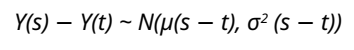

### The hypothesis of normality

●The hypothesis of normality is very important in the context of linear transformations. 

●In fact, the standard Brownian motion takes its name from the type of distribution that is a standard normal distribution, with parameters of μ = 0 and σ^{2} = 1.

●Therefore, it can be said that the Brownian motion, Y (t), with a unit mean and variance can be represented as a linear transformation of a standard Brownian otion, according to the following equation:

### The risk of the negativity

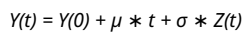

●In the previous equation, we can observe the following: 

●Z(t) is the standard Brownian motion.

●The weak point of this equation lies in the fact that the probability that Y(t) assuming a negative value is positive; in fact, since Z(t) is 
characterized by independent increments, which can assume a negative sign, the risk of the negativity of Y(t) is not zero.

●Now, consider the Brownian motion (the Wiener process) for sufficiently 
small time intervals.

### Infinitesimal increment

An infinitesimal increment of this process is obtained in the following form:

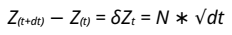

The previous equation can be rewritten as follows:

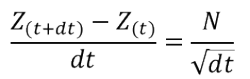

This process is not limited in variation, and, therefore, cannot be differentiated in the context of classical analysis.

In fact, the previous one tends to infinity for the interval, dt.

### Addressing the Wiener process as random walk

A Wiener process can be considered a borderline case of random walk.

We have seen that the position of a particle at instant n will be represented by the following equation:

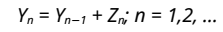

In the previous formula, we can observe the following:

●Y(n) is the next value in the walk.

●Y(n-1) is the observation in the previous time phase. 

●Z(n) is the random fluctuation in that step

### Central limit theorem

If the n random numbers, Zn, have a mean equal to zero and a variance equal to 1, then, for each value of n, we can define a stochastic process using the following equation:

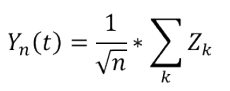

The preceding formula can be used in an iterative process. 

For very large values of n, we can write the following:

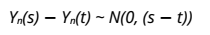

The previous formula is due to the central limit theorem that we covered in Monte 
Carlo Simulations.

### Implementing a standard Brownian

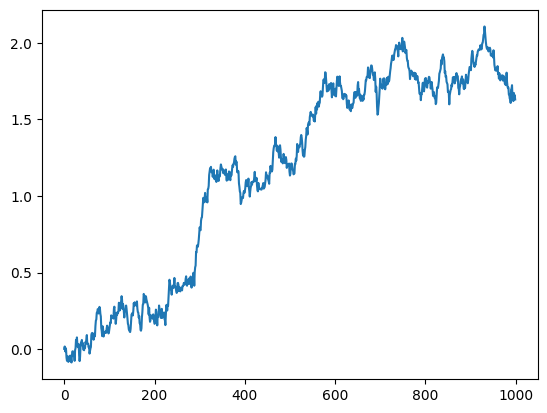

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)
n = 1000
SQN = 1 / np.math.sqrt(n) 
ZValues = np.random.randn(n) 
Yk = 0

SBMotion=list()

for k in range(n):
    Yk = Yk + SQN * ZValues[k] 
    SBMotion.append(Yk)

plt.plot(SBMotion) 
plt.show()

### Using Monte Carlo methods for stock price prediction

●As we explored in Monte Carlo Simulations chapter, Monte Carlo methods simulate different evolutions of the process under examination using different probabilities that the event may occur under certain conditions. 

●These simulations explore the entire parameter space of the phenomenon and return a representative sample.

●For each sample obtained, measures of the quantities of interest are carried out to evaluate their performance.

●A correct simulation means that the average value of the result of the process converges to the expected value.

### Exploring the Amazon stock price trend

●The stock market provides an opportunity to quickly earn large amounts of money, that is, in the eyes of an inexperienced user at least. 

●Exchanges on the stock market can cause large fluctuations in price attracting the attention of speculators from all over the world.

●In order to obtain revenues from investments in the stock market, it is necessary to have solid knowledge obtained from years of in-depth study of the phenomenon. 

●In this context, the possibility of having a tool to predict stock market securities represents a need felt by all.


### NASDAQ GS


●Let's demonstrate how to develop a simulation model of the stock of one of the most famous companies in the world. 

●Amazon was founded by Jeff Bezos in the 1990s, and it was one of the first companies in the world to sell products via the internet. 

●Amazon stock has been listed on the stock exchange since 1997 under the symbol AMZN. 

●The historical values of AMZN stock can be obtained from various internet sites that have been dealing with the stock market over the past 10 years. 

●We will refer to the performance of AMZN stock on the NASDAQ GS stock quote from 2010-05-19 to 2022-05-19. 

●In order to get the data from 2010-05-19, we need to select 2022-05-19 on the Yahoo website as the end date.


### Finance Yahoo


●Data can be downloaded in .csv format from the Yahoo Finance website at https://finance.yahoo.com/quote/AMZN/history/.

●In the following screenshot, you can see the Yahoo Finance section for AMZN stock with a highlighted button to download the data:

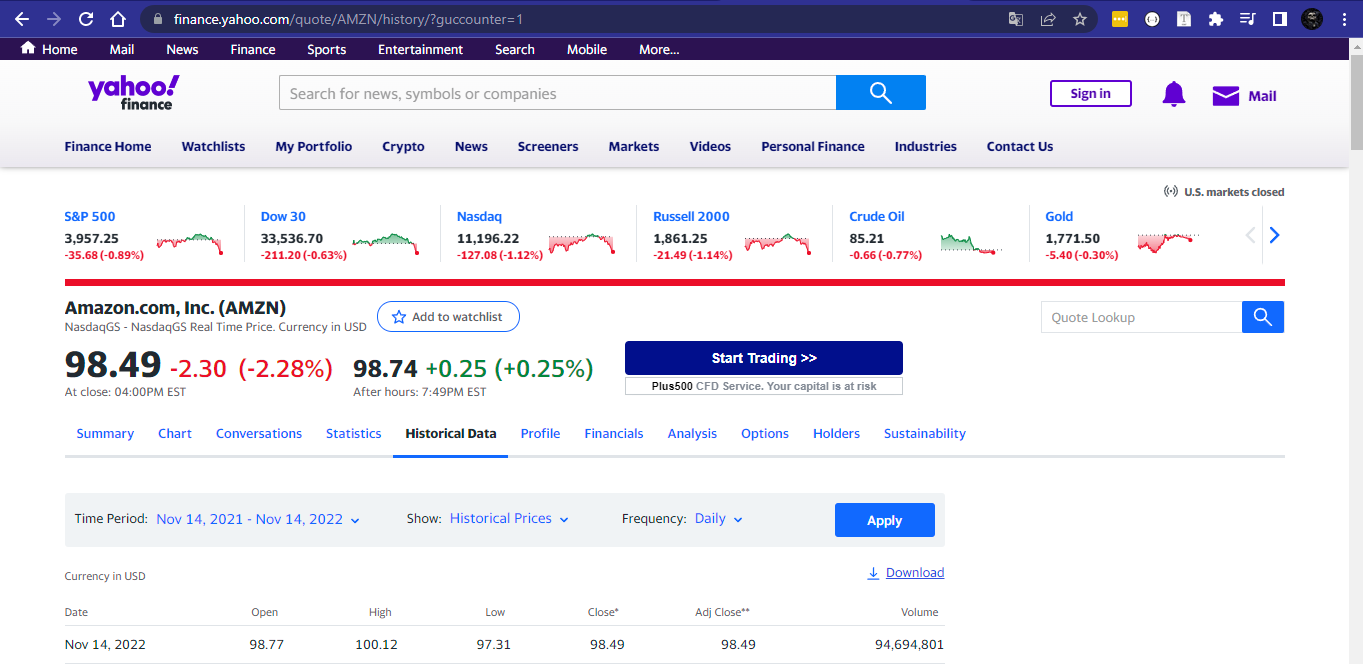

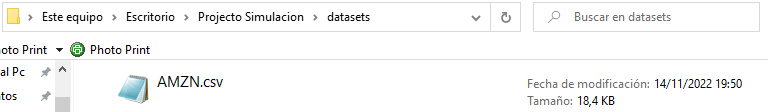

### Selecting dataset features

The downloaded AMZN.csv file contains a lot of features, but we will only use two of them, as follows:

1. Date: Date of quote 
2. Close: Close price

We will analyze the code, line by line, to fully understand the whole process, which will lead us to the simulation of a series of predicting scenarios of the performance of the Amazon stock price:

### Predicting scenarios of the performance of the Amazon stock price - 1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-11-15 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


 Informacion del dataset: 

 None


 Las primeras 5 filas del dataset son: 

                  Close
Date                  
2021-11-15  177.283997
2021-11-16  177.035004
2021-11-17  177.449997
2021-11-18  184.802994
2021-11-19  183.828506


 Dataset 

                  Close
Date                  
2022-11-08   89.980003
2022-11-09   86.139999
2022-11-10   96.629997
2022-11-11  100.790001
2022-11-14   98.489998


 Descripcion de los datos que tiene el dataset 

             Close
count  252.000000
mean   136.855752
std     24.171372
min     86.139999
25%    115.149126
50%    137.366501
75%    157.976749
max    184.802994


 Tamaño del dataset 

 (252, 1)


 Numero de filas 

 252


 Numero de columnas 

 1


 Tipos 

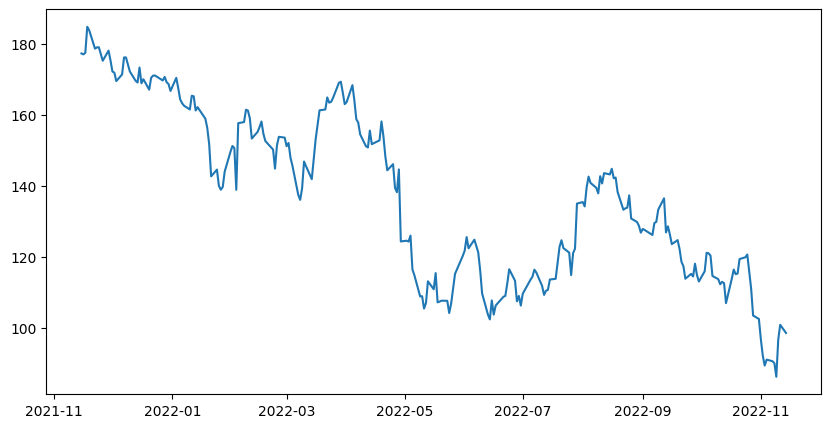

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from scipy.stats import norm 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

route = './datasets/AMZN.csv'
AmznData = pd.read_csv(route, header=0, usecols=['Date','Close'],parse_dates=True,index_col='Date')

print( "\n\n Informacion del dataset: \n\n", AmznData.info() )
print( "\n\n Las primeras 5 filas del dataset son: \n\n", AmznData.head() )
print( "\n\n Dataset \n\n", AmznData.tail() )
print( "\n\n Descripcion de los datos que tiene el dataset \n\n", AmznData.describe() )
print( "\n\n Tamaño del dataset \n\n", AmznData.shape )
print( "\n\n Numero de filas \n\n", AmznData.shape[0] )
print( "\n\n Numero de columnas \n\n", AmznData.shape[1] )
print( "\n\n Tipos de datos en el dataset \n\n", AmznData.dtypes )

plt.figure(figsize=(10,5))
plt.plot(AmznData)
plt.show()

### Handling the stock price trend as time series

The trend over time of the Amazon stock price, represented in the previous graph, is configured as a sequence of ordered data.

This type of data can be conveniently handled as a time series.

Let's consider a simple definition: a time series contains a chronological sequence of experimental observations of a variable.

This variable can relate to data of different origins.

Very often, it concerns financial data such as unemployment rates, spreads, stock market indices, and stock price trends.


### Management of future scenarios


Dealing with the problem as a time series will allow us to extract useful information from the data in order to develop predictive models for the management of future scenarios.

It may be useful to compare the trend of stock prices in the same periods for different years or, more simply, between contiguous periods.



### Time series


Let Y(1), …, Y(t), …, Y(n) be the elements of a time series. 

Let's start by comparing the data for two different times indicated with t and t + 1.

It is, therefore, two contiguous periods; we are interested in evaluating the variation undergone by the phenomenon under observation, which can be defined by the following ratio:

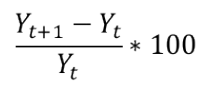


### Percentage change


●This percentage ratio is called a percentage change. 

●It can be defined as the percentage change rate of Y of time (t + 1) compared to the previous time, t.

●This descriptor returns information about how the data underwent a change over a period. 

●The percentage change allows you to monitor both the stock prices and the market indices, not just comparing currencies from different countries.


### Predicting scenarios of the performance of the Amazon stock price - 3

               Close
Date                
2022-11-01 -0.056734
2022-11-02 -0.049452
2022-11-03 -0.031091
2022-11-04  0.018638
2022-11-07 -0.004958
2022-11-08 -0.006094
2022-11-09 -0.043614
2022-11-10  0.114915
2022-11-11  0.042150
2022-11-14 -0.023084


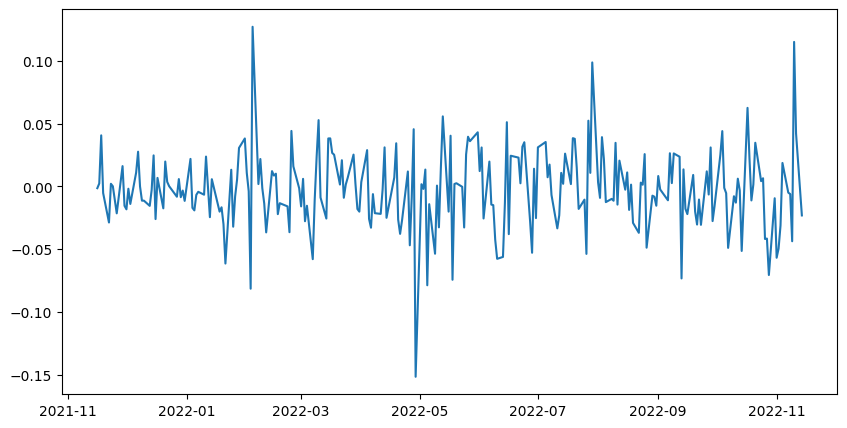

In [6]:
AmznDataPctChange = AmznData.pct_change() 

AmznLogReturns = np.log(1 + AmznDataPctChange) 

print(AmznLogReturns.tail(10))

plt.figure(figsize=(10,5))
plt.plot(AmznLogReturns)
plt.show()

### Evaluating percentage change

●    To evaluate this useful descriptor, we will use the pct_change() function contained in the pandas library. 

●    This function returns the percentage change between the current element and a previous element.

●    By default, the function calculates the percentage change from the immediately preceding row.


### Percentage variation


●    The concept of the percentage variation of a time series is linked to the concept of the return of a stock price.

●    The returns-based approach allows the normalization of data, which is an operation of fundamental importance when evaluating the relationships between variables characterized by different metrics.

●    We will deal with the return on a logarithmic scale as this choice will give us several advantages: normally distributed results; values returned (logarithm of the return) very close to the initial one (the return), at least for very small values; and additive results over time.


### Introducing the Black-Scholes model


●    The Black-Scholes (BS) model certainly represents the most important and revolutionary work in the history of quantitative finance.

●    In traditional financial literature, it is assumed that almost all financial asset prices (stocks, currencies, and interest rates) are driven by a Brownian drift motion.

●    This model assumes that the expected return of an asset is equal to the non-risky interest rate, r.

●    This approach is capable of simulating returns on a logarithmic scale of an asset.


### Calculating the return


●    Suppose we observe an asset in the instants: t(0), t(1)...,t(n). 

●    We note, using s(i) = S(ti), the value of an asset at t(i).

●    Based on these hypotheses, we can calculate the return using the following equation:

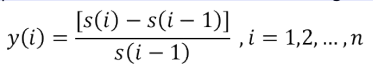

●    Suppose we observe an asset in the instants: t(0), t(1)...,t(n).

●    We note, using s(i) = S(ti), the value of an asset at t(i). 

● Based on these hypotheses, we can calculate the return using the following equation:

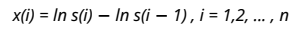


### Applying the BS approach to Brownian geometric motion

●    By applying the BS approach to Brownian geometric motion, the stock price will satisfy the following stochastic differential equation:

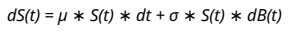

●    In the previous equation, dB(t) is a standard Brownian motion and μ and σ are real constants. 

●    The previous equation is valid where the hypothesis that s(i) - s(i - 1) is small, and this happens when the stock prices undergo slight variations. 

●    This is because ln (1 + z) is roughly equal to z if z is small. 

●    The analytical solution of the previous equation is the following equation: 

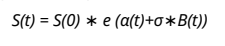



### Passing the equation on a logarithmic scale


●    By passing the previous equation on a logarithmic scale, we obtain the following equation:

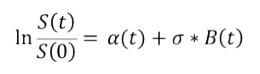

● In the previous equation, we can observe the following:

1. α is the drift.
2. B(t) is a standard Brownian motion. 
3. σ is the standard deviation.

### Drift

●    We introduced the concept of drift, which represents the trend of a long-term asset in the stock market.

●    To understand drift, we will use the concept of river currents. 

●    If we pour liquid color into a river, it will spread by following the direction imposed by the river's current. 

●    Similarly, drift represents the tendency of a stock to follow the trend of a long-term asset.


### Applying Monte Carlo simulation


Using the BS model discussed in the previous section, we can evaluate the daily price of an asset starting from that of the previous day multiplied by an exponential contribution based on a coefficient, r.

This coefficient is a periodic rate of return. 

It translates into the following equation:

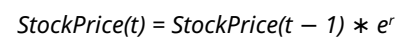

### Daily return

The second term in the previous equation, er, is called the daily return, and, according to the BS model, it is given by the following formula:

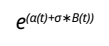

There is no way to predict the rate of return of an asset. The only way to represent it is to consider it as a random number. So, to predict the price trend of an asset, we can use a model based on random movement such as that represented by BS equations.


### The fixed drift rate and the random stochastic variable

The BS model assumes that changes in the stock price depend on the expected return over time. The daily return has two terms: the fixed drift rate and the random stochastic variable. The two terms provide for the certainty of movement and uncertainty caused by volatility. To calculate the drift, we will use the expected rate of return, which is the most likely rate to occur, using the historical average of the log returns and variance, as follows:

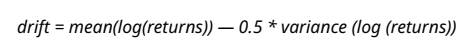

### Calculating the drift for the return of the Amazon

According to the previous equation, the daily change rate of the asset is the mean of the returns, which are less than half of the variance over time. We continue our work, calculating the drift for the return of the Amazon security calculated in the Handling the stock price trend as time series section.

### Calculating the drift

To evaluate the drift, we need the mean and variance of the returns. Since we also calculate the standard deviation, we will need the calculation of the daily return. Three numpy functions were used:

1. mean(): This computes the arithmetic mean along the specified axis and returns the average of the array elements.
2. var(): This computes the variance along the specified axis. It returns the variance of the array elements, which is a measure of the spread of a distribution.
3. std(): This computes the standard deviation along the specified axis.

Now we can calculate the drift.

In [7]:
MeanLogReturns = np.array(AmznLogReturns.mean()) 
VarLogReturns = np.array(AmznLogReturns.var()) 
StdevLogReturns = np.array(AmznLogReturns.std())

Drift = MeanLogReturns - (0.5 * VarLogReturns) 
print("Drift = ", Drift)

Drift =  [-0.00282969]


This is the fixed part of the Brownian motion. The drift returns the annualized change in the expected value and compensates for the asymmetry in the results compared to the straight Brownian motion.

### Standard deviations

To evaluate the second component of the Brownian motion, we will use the random stochastic variable. This corresponds to the distance between the mean and the events, expressed as the number of standard deviations. Before doing this, we need to set the number of intervals and iterations. The number of intervals will be equal to the number of observations, which is 3,022, while the number of iterations, which represents the number of simulation models that we intend to develop, is 20.

### Random contribution for simulations

Before generating random values, it is recommended that you set the seed to make the experiment reproducible. Now, we can generate the random distribution with norm.ppf() function. A 3022 x 20 matrix is returned, containing the random contribution for the 20 simulations that we want to perform and for the 3,022 time 
intervals that we want to consider. Recall that these intervals correspond to the daily prices of the last 10 years.


### Random contribution functions

Two functions were used:
1. norm.ppf(): This SciPy function gives the value of the variate for which the cumulative probability has the given value.
2. np.random.rand(): This NumPy function computes random values in a given shape. It creates an array of the given shape and populates it with random samples from a uniform distribution over [0, 1].

### Daily return interpretation

So, we will calculate the daily return. The daily return is a measure of the change that occurred in a stock's price. It is expressed as a percentage of the previous day's closing price. A positive return means the stock has grown in value, while a negative return means it has lost value.The np.exp() function was used to calculate the exponential of all elements in the input array.

In [8]:
NumIntervals = 3022 
Iterations = 20
np.random.seed(7) 
SBMotion = norm.ppf( np.random.rand(NumIntervals, Iterations) )
DailyReturns = np.exp(Drift + StdevLogReturns * SBMotion)

### Initializing the prediction array

After long preparation, we have arrived at a crucial moment. We will be able to carry out predictions based on the Monte Carlo method. The first thing to do is to recover the starting point of our simulation. Since we want to predict the trend of Amazon stock prices, we recover the first value present in the AMZN.csv file. The pandas iloc() function is used to return a pure integer using location-based indexing for selection. Then, we will initialize the array that will contain the predictions. The numpy zeros_like() function is used to return an array of zeros with the same shape and type as a given array.


### Updating the predictions

Now, we will set the starting value of the StockPrice array. To update the predictions of the Amazon stock prices, we will use a for loop that iterates for a number that is equal to the time intervals we are considering. For the update, we will use the BS model according to the following equation:

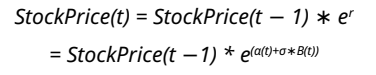

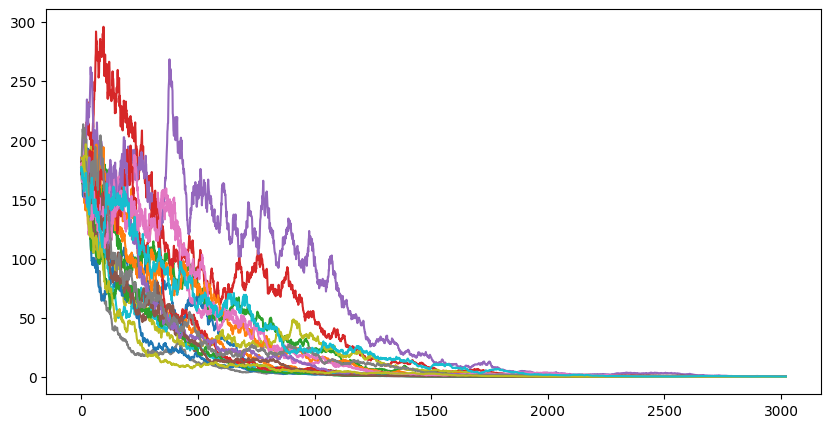

In [9]:
StartStockPrices = AmznData.iloc[0] 

StockPrice = np.zeros_like(DailyReturns) 

StockPrice[0] = StartStockPrices

for t in range(1, NumIntervals):
    StockPrice[t] = StockPrice[t - 1] * DailyReturns[t] 
    
plt.figure(figsize=(10,5))
plt.plot(StockPrice)

### Amazon trend graph interpretation

In the previous graph, the curve highlighted in black represents the trend of the Amazon stock prices in the last 10 years. The other curves are our simulations. We can see that some curves move away from the expected curve, while others appear much closer to the actual trend.

### Studying risk models for portfolio management

Having a good risk measure is of fundamental importance in finance, as it is one of the main tools for evaluating financial assets. This is because it allows you to monitor securities and provides a criterion for the construction of portfolios. One measure, more than any other, that has been widely used over the years is variance.


### Using variance as a risk measure

The advantage of a diversified portfolio in terms of risk and the expected value allows us to find the right allocation for the securities.

Our aim is to obtain the highest expected value at the same risk or to minimize the risk of obtaining the same expected value. 

To achieve this, it is necessary to trace the concept of risk back to a measurable quantity, which is generally referred to as the variance.

Therefore, by maximizing the expected value of the portfolio returns for each level of variance, it is possible to reconstruct a curve called the efficient frontier, which determines the maximum expected value that can be obtained with the securities available for the construction of the portfolio for each level of risk.


### Mean and variance

The minimum variance portfolio represents the portfolio with the lowest possible variance value regardless of the expected value. 

This parameter has the purpose of optimizing the risk represented by the variance of the portfolio. 

Tracing the risk exclusively to the measure of variance is optimal only if the distribution of returns is normal.

In fact, the normal distribution enjoys some properties that make the variance a measure that is enough to represent the risk. 

It is completely determinable through only two parameters (mean and variance). 

It is, therefore, enough to know the mean and the variance to determine any other point of the distribution.

### Introducing the value-at-risk metric

Consider the variance as the only risk measure in the case of non-normal and limiting values. 

A risk measure that has been widely used for over two decades is Value at Risk (VaR).

The birth of VaR was linked to the growing need for financial institutions to manage risk and, therefore, be able to measure it. 

This is due to the increasingly complex structure of financial markets.


### Risk as a financial assets


Actually, this measure was not introduced to stem the limits of variance as a risk measure since an approach to calculate the VaR value starts precisely from the assumptions of normality.

However, to make it easier to understand, let's enclose the overall risk of a security into a single number or a portfolio of financial assets by adopting a single metric for different types of risk.



### VaR


In the financial context, the VaR is an estimate, given a confidence interval, of how high the losses of a security or portfolio may be in each time horizon. 

The VaR, therefore, focuses on the left tail of the distribution of returns, where events with a low probability of realization are located. 

Indicating the losses and not the dispersion of the returns around their expected value makes it a measure closer to the common idea of risk than variance.


### J.P. Morgan

J.P. Morgan is credited as the bank that made VaR a widespread measure. 

In 1990, the president of J.P. Morgan, Dennis Weatherstone, was dissatisfied with the lengthy risk analysis reports he received every day. 

He wanted a simple report that summarized the bank's total exposure across its entire trading portfolio.

After calculating the VaR, we can say that, with a probability given by the confidence interval, we will not lose more than the VaR of the portfolio in the next 
N days. 

VaR is the level of loss that will not be exceeded with a probability given by the confidence interval.



### VaR example


For example, a VaR of €1 million over a year with a 95% confidence level means that the maximum loss for the portfolio for the next year will be €1 million in 95% of cases.

Nothing tells us what happens to the remaining 5% of cases.

The following graph shows the probability distribution of portfolio returns with the indication of the value of the VaR:

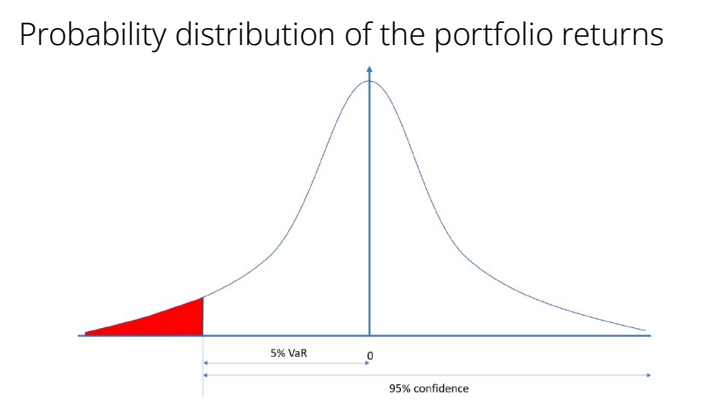



### VaR characteristics


VaR is a function of the following two parameters:

1. Time horizon
2. Level of confidence

Some characteristics of VaR must be specified:

3. VaR does not describe the worst loss.
4. VaR says nothing about the distribution of losses in the left tail. 
5. VaR is subject to sampling errors.

The sampling error tells us how much the sampled value deviates from the real population value. 

This deviation is because the sample is not representative of the population or has distortions.



### How bad can financial investments go?


VaR is a widely used risk measure that summarizes, in a single number, important aspects of the risk of a portfolio of financial instruments. It has the same unit of measurement as the returns of the portfolio on which it is calculated, and it is simple to understand, answering the simple question: How bad can financial investments go? Let's now examine a practical case of calculating the VaR.


### Estimating the VaR for some NASDAQ assets

NASDAQ is one of the most famous stock market indices in the world. 

Its name is an acronym for the National Association of Securities Dealers Quotation. 

This is the index that represents the stocks of the technology sector in the US. 

Thinking of NASDAQ in the investor's mind, the brands of the main technological and social houses of the US can easily emerge. 

Just think of companies such as Google, Amazon, Facebook, and many others; they are all covered by the NASDAQ listing.


### Estimating the risk associated

In [11]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import datetime as dt
import numpy as np
import pandas_datareader.data as wb
import matplotlib.pyplot as plt 
from scipy.stats import norm

StockList = ['ADBE','CSCO','IBM','NVDA','MSFT','HPQ'] 
StartDay = dt.datetime(2021, 1, 1)
EndDay = dt.datetime(2021, 12, 31)


### Tickers

Six tickers have been included in a DataFrame. A ticker is an abbreviation used to uniquely identify the sharess listed on the stock exchange of a particular security on a specific stock market. It is made up of letters, numbers, or a combination of both. The tickers are used to refer to six leading companies in the global technology sector:

### Tech tickers

1. ADBE: Adobe Systems Inc. – one of the largest and most differentiated software companies in the world.
2. CSCO: Cisco Systems Inc. – the production of Internet Protocol (IP)-based networking and other products for communications and information technology.
3. IBM: International Business Machines – the production and consultancy of information technology-related products.
4. NVDA: Nvidia Corp. – visual computing technologies. This is the company that invented the GPU. 
5. MSFT: Microsoft Corp. – this is one of the most important companies in the sector, as well as one of the largest software producers in the world by turnover.
6. HPQ: HP Inc. – the leading global provider of products, technologies, software, solutions, and services to individual consumers and large enterprises.

In [19]:
# Estimating the risk associated
StockData =  wb.DataReader(StockList, 'yahoo', StartDay, EndDay)

StockClose = StockData["Adj Close"] 

print(StockClose.describe())

Symbols        ADBE        CSCO         IBM        NVDA        MSFT  \
count    252.000000  252.000000  252.000000  252.000000  252.000000   
mean     560.613652   51.155371  120.072631  195.025936  273.160699   
std       76.180505    4.618405    8.234086   58.695393   37.209664   
min      421.200012   41.743752  102.834602  115.752731  209.119354   
25%      488.294998   49.123184  113.083153  142.970486  240.849701   
50%      569.324982   51.584745  123.242039  191.879822  274.337830   
75%      632.419998   54.217451  127.105103  222.241837  299.335556   
max      688.369995   62.013485  134.431137  333.492706  340.882812   

Symbols         HPQ  
count    252.000000  
mean      29.193442  
std        3.222804  
min       22.972630  
25%       27.233362  
50%       28.697908  
75%       30.853753  
max       37.263916  


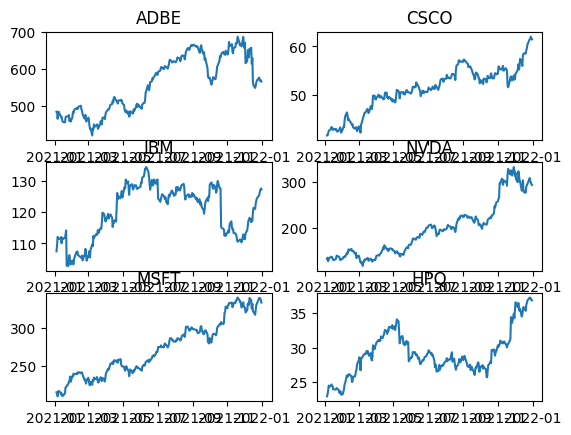

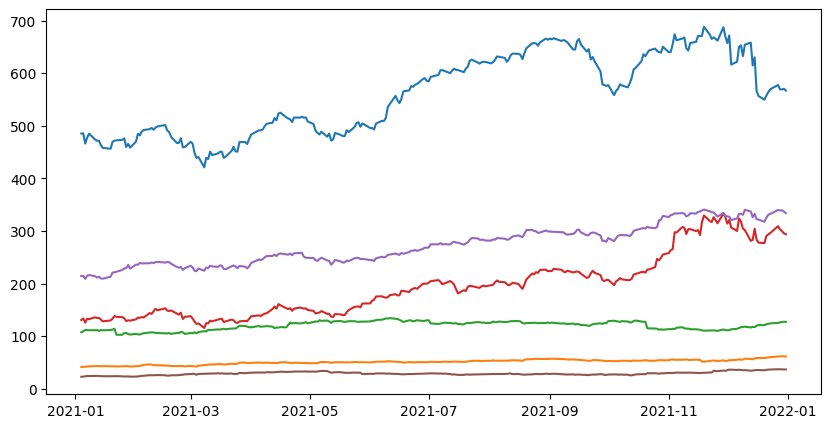

In [20]:
# Graphs of the statistics

fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(StockClose['ADBE'])
axs[0, 0].set_title('ADBE')
axs[0, 1].plot(StockClose['CSCO'])
axs[0, 1].set_title('CSCO')
axs[1, 0].plot(StockClose['IBM'])
axs[1, 0].set_title('IBM')
axs[1, 1].plot(StockClose['NVDA'])
axs[1, 1].set_title('NVDA')
axs[2, 0].plot(StockClose['MSFT'])
axs[2, 0].set_title('MSFT')
axs[2, 1].plot(StockClose['HPQ'])
axs[2, 1].set_title('HPQ')

plt.figure(figsize=(10,5))
plt.plot(StockClose)
plt.show()

In [21]:
# The Stock returns Dataframe
StockReturns = StockClose.pct_change() 
print(StockReturns.tail(15))

Symbols         ADBE      CSCO       IBM      NVDA      MSFT       HPQ
Date                                                                  
2021-12-10  0.034589  0.029540  0.004208 -0.009577  0.028340  0.007745
2021-12-13  0.005883 -0.010802 -0.012169 -0.067455 -0.009167 -0.031567
2021-12-14 -0.065988 -0.014332  0.009626  0.006250 -0.032587  0.009070
2021-12-15  0.025160  0.037390 -0.005252  0.074885  0.019218  0.018539
2021-12-16 -0.101915  0.006341  0.022906 -0.068026 -0.029135  0.012135
2021-12-17 -0.016693  0.002487  0.011673 -0.020643 -0.003386 -0.003542
2021-12-20 -0.012342 -0.001654 -0.002669 -0.002949 -0.012014 -0.012032
2021-12-21  0.014097  0.011100  0.015032  0.048919  0.023069  0.024633
2021-12-22  0.011587  0.008193  0.006048  0.011178  0.018057  0.007023
2021-12-23  0.010000  0.012189  0.006782  0.008163  0.004472  0.009925
2021-12-27  0.014150  0.018304  0.007579  0.044029  0.023186  0.011952
2021-12-28 -0.014402  0.001735  0.007674 -0.020133 -0.003504 -0.003937
2021-1

In [22]:
PortfolioValue = 1000000000.00 
ConfidenceValue = 0.95
MeanStockRet = np.mean(StockReturns) 
StdStockRet = np.std(StockReturns)

C:\Program Files\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### The mean and standard deviation of returns

To start, we set the value of our portfolio; it is a billion dollars. 
These figures should not frighten you. 
For a bank that manages numerous investors, achieving this investment value is not difficult. 
So, we set the confidence interval.
Previously, we said that VaR is based on this value. 
Subsequently, we started to calculate some fundamental quantities for the VaR calculation. 
I am referring to the mean and standard deviation of returns. 
To do this, we used the related numpy functions: np.mean () and np.std.

In [23]:
WorkingDays2021 = 252.
AnnualizedMeanStockRet = MeanStockRet / WorkingDays2021
AnnualizedStdStockRet = StdStockRet / np.sqrt(WorkingDays2021)

### Working days

Previously, we saw that the data extracted from the finance section of the Yahoo website contained 252 records.
This is the number of working days of the stock exchange in 2021, so we set this value. 
So, let's move on to annualizing the mean and the standard deviation just calculated. 
This is because we want to calculate the annual risk index of the stocks.
For the annualization of the average, it is enough to divide by the number of working days, while for the standard deviation, we must divide by the square 
root of the number of working days.

In [24]:
INPD = norm.ppf(1 - ConfidenceValue, AnnualizedMeanStockRet, AnnualizedStdStockRet) 
VaR = PortfolioValue * INPD

### Calculating the inverse normal probability distribution

To start, we calculate the inverse normal probability distribution with a risk level of 1 for the confidence, mean, and standard deviation.
This technique involves the construction of a probability distribution starting from the three parameters we have mentioned. 
In this case, we work backward, starting from some distribution statistics, and try to reconstruct the starting distribution. 
To do this, we use the norm.ppf() function of the SciPy library.

### PPF

The norm() function returns a normal continuous random variable. 
The acronym, ppf, stands for percentage point function, which is another name for the quantile function.
The quantile function, associated with a probability distribution of a random variable, specifies the value of the random variable so that the probability that the variable is less than or equal to that value is equal to the given probability.

### Calculating VaR

At this point, the VaR is calculated by multiplying the inverse normal probability distribution obtained by the value of the portfolio. 
To make the value obtained more readable, it was rounded to the first two decimal places.
Finally, the results obtained were printed, one for each row, to make the comparison simple.

In [25]:
RoundVaR = np.round_(VaR, 2) 

for i in range(len(StockList)):
    print("Value-at-Risk for", StockList[i], "is equal to ", RoundVaR[i])

Value-at-Risk for ADBE is equal to  -1901394.1
Value-at-Risk for CSCO is equal to  -1244064.91
Value-at-Risk for IBM is equal to  -1485930.87
Value-at-Risk for NVDA is equal to  -2922035.07
Value-at-Risk for MSFT is equal to  -1358219.01
Value-at-Risk for HPQ is equal to  -2020464.96


### Result interpretation

The stocks that returned the highest risk were HP and IBM, while the one that returned the lowest risk was the Microsoft stock.

### References

Giuseppe Ciaburro. Hands-On Simulation Modeling with Python. Packtpub, 2020